# Kaggle自行车租赁预测比赛

Kaggle中最有名的例子是[泰坦尼克号之灾](https://www.kaggle.com/c/titanic)的例子，因为数据量小，同时趣味性很浓。我之前写过一篇博客[逻辑回归应用之Kaggle泰坦尼克之灾](http://blog.csdn.net/han_xiaoyang/article/details/49797143)，介绍了一下逻辑斯特回归在这样一个分类问题上的应用，以及，一个完整的机器学习是什么样的。<br><br>
这里的[Kaggle自行车租赁预测比赛](https://www.kaggle.com/c/bike-sharing-demand)也同样是一个很有趣的问题，之所以要把它单拎出来，讲一讲，2个原因和[泰坦尼克号之灾](https://www.kaggle.com/c/titanic)是一样的，另外一个原因是，这是一个连续值预测的问题，也就是我们说的机器学习中的回归问题，本着各类问题我们都要覆盖一下的标准，咱们一起来看看这个问题。<br><br>
这是一个城市自行车租赁系统，提供的数据为2年内华盛顿按小时记录的自行车租赁数据，其中训练集由每个月的前19天组成，测试集由20号之后的时间组成（需要我们自己去预测）。

# 数据读取与预分析

**老朋友最靠谱，最好用，继续用python中数据分析有着不可撼动统治地位的pandas包**<br>
**numpy是科学计算包，也是肯定要用的。**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('kaggle_bike_competition_train.csv',header = 0)

**<font color=red>读到内存里了，先拿出来亮亮相，我们一起来瞄一眼前10行</font>**

In [3]:
df_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**就喜欢这种顺畅的excel表格形式，常年懒癌晚期，于是乎我们让pandas自己告诉我们一些信息**<br>
**<font color=red>字段的名字和类型咱们总得了解一下吧</font>**

In [4]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

**<font color=red>接下来咱们总得了解一下我们的任务有多艰巨(数据量有多大)吧</font>**

In [5]:
#让它告诉我们形状
df_train.shape

(10886, 12)

**<font color=red>我们总结一下，总共有10886行，同时每一行有12列不同的信息</font>**<br>
**<font color=red>那个，记得我们说过的脏数据问题吧，所以呢，我们看看有没有缺省的字段</font>**<br>

In [6]:
df_train.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

**<font color=red>→_→可见万恶的资本主义郭嘉的记录系统多么严谨完善，居然就没有缺省值</font>**

In [7]:
type(df_train.datetime)

pandas.core.series.Series

In [8]:
df_train['datetime'] = pd.to_datetime(df_train.datetime)

**<font color=red>咱们第一个来处理时间，因为它包含的信息总是非常多的，毕竟变化都是随着时间发生的嘛</font>**

In [9]:
# 把月、日、和 小时单独拎出来，放到3列中
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

In [10]:
df_train['month'].value_counts()
df_train['hour'].value_counts()
df_train['day'].value_counts()
# 分组
# df_train.groupby(['hour'])['count'].mean()
# df_train['count'].groupby(df_train['hour']).mean()
# plt.plot(range(0,24), df_train['count'].groupby(df_train['hour']).mean())

# 会出现早高峰和晚高峰
# plt.plot(range(0,4), df_train['count'].groupby(df_train['season']).mean())

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: day, dtype: int64

###### 做一个对每个小时count的箱线图

In [12]:
# a = pd.pivot_table(df_train[['hour','count']], columns='hour',values='count', aggfunc={'count':np.sum})
# plt.boxplot(a)
a = pd.pivot_table(df_train[['datetime','hour','count']], index='datetime',columns='hour',values='count')
a.shape
df_train['hour'].value_counts()

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [13]:
# 再看
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,5,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,5,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,5,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,5,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,5,9


**<font color=red>那个，既然时间大串已经被我们处理过了，那这个字段放着太占地方，干脆就不要了吧</font>**<br>
**<font color=red>先上一个粗暴的版本，咱们把注册租户和未注册租户也先丢掉，回头咱们再看另外一种处理方式</font>**

In [14]:
# 那个，保险起见，咱们还是先存一下吧
df_train_origin = df_train
# 抛掉不要的字段
df_train = df_train.drop(['datetime','casual','registered'], axis = 1)

In [15]:
# 看一眼
df_train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


**<font color=red>赞，干净多了</font>**

In [16]:
df_train.shape

(10886, 12)

**<font color=red>分成2部分:</font>**<br>
**<font color=red>1. df_train_target：目标，也就是count字段。</font>**<br>
**<font color=red>2. df_train_data：用于产出特征的数据</font>**

In [17]:
df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis = 1).values
print('df_train_data shape is ', df_train_data.shape)
print('df_train_target shape is ', df_train_target.shape) 

df_train_data shape is  (10886, 11)
df_train_target shape is  (10886,)


# 机器学习算法

**<font color=red>下面的过程会让你看到，其实应用机器学习算法的过程，多半是在调参，各种不同的参数会带来不同的结果（比如正则化系数，比如决策树类的算法的树深和棵树，比如距离判定准则等等等等）</font>**

In [55]:
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve,GridSearchCV,ShuffleSplit,KFold, cross_validate,train_test_split
from sklearn.metrics import explained_variance_score

**<font color=red>数据量不算大，世界那么大，你想去看看，没钱看不成；模型这么多，你尽量试试总可以吧。</font>**<br><br>
**<font color=red>咱们依旧会使用交叉验证的方式（交叉验证集约占全部数据的20%）来看看模型的效果，我们会试 支持向量回归/Suport Vector Regression, 岭回归/Ridge Regression 和 随机森林回归/Random Forest Regressor。每个模型会跑3趟看平均的结果。</font>**<br><br>
**<font color=red>什么，你说这些模型还没讲，你都不懂？没关系，先练练手试试咯，学会读文档嘛。</font>**<br><br>
[支持向量回归](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)<br>
[岭回归](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)<br>
[随机森林回归](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [50]:
# 总得切分一下数据咯（训练集和测试集）
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
# cv.split(df_train_data) 得到的两个值为数据行索引
# for train_index,test_index in cv.split(df_train_data):
#     print("Train Index:",train_index,",Test Index:",test_index)

# 各种模型来一圈
print("岭回归")
for train, test in cv.split(df_train_data):    
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print("支持向量回归/SVR(kernel='rbf',C=10,gamma=.1)")
for train, test in cv.split(df_train_data):
    svc = svm.SVR(kernel ='rbf', C = 20, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print("随机森林回归/Random Forest(n_estimators = 100)")
for train, test in cv.split(df_train_data):    
    svc = RandomForestRegressor(n_estimators = 100, max_features='sqrt',random_state=0).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

岭回归
train score: 0.339, test score: 0.332

train score: 0.330, test score: 0.370

train score: 0.342, test score: 0.320

支持向量回归/SVR(kernel='rbf',C=10,gamma=.1)
train score: 0.439, test score: 0.430

train score: 0.427, test score: 0.471

train score: 0.440, test score: 0.412

随机森林回归/Random Forest(n_estimators = 100)
train score: 0.978, test score: 0.842

train score: 0.979, test score: 0.861

train score: 0.979, test score: 0.850



**<font color=red>不出意料，随机森林回归获得了最佳结果。。。</font>**<br><br>
**<font color=red>不过，那个，大家有没有想过，也有可能是你的参数设置的不对啊？这个，留给大家自己去试试咯，试完告诉我，哈哈</font>**<br><br>
**<font color=red>好多同学问参数咋调啊？我们有一个工具可以帮忙，叫做GridSearch，可以在你喝咖啡的时候，帮你搬搬砖，找找参数</font>**<br><br>

In [66]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tuned_parameters = [{'n_estimators':[10,100,500]}]   
    
scores = ['r2']

for score in scores:
    
    print(score)
    
    clf = GridSearchCV(estimator=RandomForestRegressor(n_estimators=10,max_features='sqrt'), param_grid=tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("别！喝！咖！啡！了！最佳参数找到了亲！！：\n")
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_params_)

r2
别！喝！咖！啡！了！最佳参数找到了亲！！：

{'n_estimators': 500}
得分分别是:

r2


**<font color=red>你看到咯，Grid Search帮你挑参数还是蛮方便的，你也可以大胆放心地在刚才其他的模型上试一把。</font>**<br>
**<font color=red>而且要看看模型状态是不是，过拟合or欠拟合</font>**<br>
**<font color=red>依旧是学习曲线</font>**

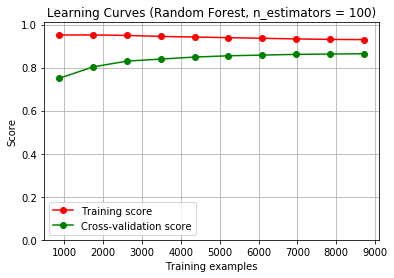

In [78]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    train_sizes 的意思是首先选取样本为这些比例的样本，将其划分用cv参数，然后看score
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100, max_depth=12, max_features=0.7)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=2)

plt.show()

**<font color=red>看出来了吧，训练集和测试集直接间隔那么大，这。。。一定是过拟合了</font>**<br>
**<font color=red>随机森林这种算法学习能力非常强啦，大家从最上面对比各个模型得分的时候也可以看到，训练集和测试集的得分也是差蛮多的，过拟合还蛮明显。所以，我能说什么呢，你用了核弹去消灭蝗虫，然后土壤也有点长不出植物了</font>**<br>
**<font color=red>so, 过拟合咱们怎么办来着？你来回答下？忘了？那还不去翻翻ppt</font>**<br>

In [74]:
# 尝试一下缓解过拟合，当然，未必成功
print("随机森林回归/Random Forest(n_estimators=200, max_features=0.6, max_depth=15)")
for train, test in cv.split(df_train_data): 
    svc = RandomForestRegressor(n_estimators = 150, max_features=0.7, max_depth=14).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

随机森林回归/Random Forest(n_estimators=200, max_features=0.6, max_depth=15)
train score: 0.957, test score: 0.867

train score: 0.958, test score: 0.883

train score: 0.957, test score: 0.871

train score: 0.957, test score: 0.873

train score: 0.959, test score: 0.868

train score: 0.957, test score: 0.870

train score: 0.958, test score: 0.860

train score: 0.957, test score: 0.873

train score: 0.957, test score: 0.870

train score: 0.958, test score: 0.865



**<font color=red>不知道大家有没有印象，我们之前说了，我们把“注册用户”和“未注册用户”加一块儿做的预测。</font>**<br>
**<font color=red>另外一个思路是，咱们可以试着分开这两部分，分别预测一下，再求和嘛。</font>**<br>
**<font color=red>话说，特征和对应的“注册”和“未注册”用户都有了，这个部分就当做作业吧，大家试试。</font>**

In [79]:
# 看你们自己的咯
df_train_registered = df_train_origin.drop(['datetime','casual','count'], axis = 1)
df_train_casual = df_train_origin.drop(['datetime','count','registered'], axis = 1)

In [81]:
df_train_registered.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,13,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,32,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,27,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,10,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


In [82]:
df_train_casual.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,5,4


In [84]:
df_train['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

#### <font color=red>听说有同学问，为啥这个例子中没有数据分析，咳咳，那好吧，补充一下。那个，分析得到的结果，你们观察观察，看看有什么角度可以帮忙改善一下特征或者模型，看好你们^_^</font>

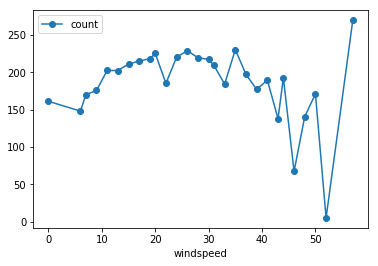

In [83]:
# 风速
df_train_origin.groupby('windspeed').mean().plot(y='count', marker='o')
plt.show()

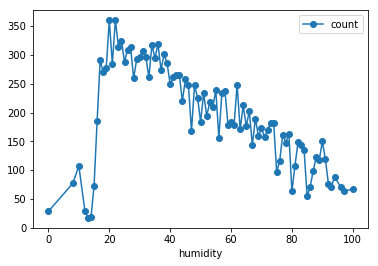

In [85]:
# 湿度
df_train_origin.groupby('humidity').mean().plot(y='count', marker='o')
plt.show()

In [ ]:
# 温度
df_train_origin.groupby('temp').mean().plot(y='count', marker='o')
plt.show()

In [ ]:
df_train.columns

In [ ]:
sns.jointplot(x='temp', y='humidity', data=df_train)

In [ ]:
#温度湿度变化
df_train_origin.plot(x='temp', y='humidity', kind='scatter')
plt.show()

In [ ]:
# scatter一下各个维度
fig, axs = plt.subplots(2, 3, sharey=True)
df_train_origin.plot(kind='scatter', x='temp', y='count', ax=axs[0, 0], figsize=(16, 8), color='magenta')
df_train_origin.plot(kind='scatter', x='atemp', y='count', ax=axs[0, 1], color='cyan')
df_train_origin.plot(kind='scatter', x='humidity', y='count', ax=axs[0, 2], color='red')
df_train_origin.plot(kind='scatter', x='windspeed', y='count', ax=axs[1, 0], color='yellow')
df_train_origin.plot(kind='scatter', x='month', y='count', ax=axs[1, 1], color='blue')
df_train_origin.plot(kind='scatter', x='hour', y='count', ax=axs[1, 2], color='green')

In [ ]:
sns.pairplot(df_train_origin[["temp", "month", "humidity", "count"]], hue="count")

In [ ]:
# 来看看相关度咯
corr = df_train_origin[['temp','weather','windspeed','day', 'month', 'hour','count']].corr()
corr

In [ ]:
# 用颜色深浅来表示相关度
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()